### 데이터 로드 및 전처리

In [1]:
import pandas as pd
import numpy as np

# 데이터 전처리에 필요한 패키지 장착

In [2]:
GJ_2009=pd.read_csv("./NHIS_OPEN_GJ_2009.csv",encoding='CP949') # 데이터 불러오기
GJ_2009.head() # 데이터 일부 확인

,HCHK_YEAR,IDV_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTH_MSS_YN,ODT_TRB_YN,WSDM_DIS_YN,TTR_YN,DATA_STD_DT
0,2009,279847,2,14,41,135,35,79,9.9,0.1,...,13,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20151220
1,2009,46535,2,1,26,145,40,62,1.0,1.0,...,11,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20151220
2,2009,180895,2,1,11,145,40,58,1.0,1.2,...,7,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,20151220
3,2009,19658,2,1,11,145,40,67,1.2,1.2,...,12,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,20151220
4,2009,18537,2,1,41,145,40,67,0.3,0.3,...,7,1.0,1.0,1,NaN,0.0,0.0,0.0,0.0,20151220


In [3]:
GJ_2009.shape # 데이터 차원 : 1000000 x 34

(1000000, 34)

In [4]:
GJ_2009.info() # 34개 변수 타입 : 정수형 또는 실수형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
HCHK_YEAR            1000000 non-null int64
IDV_ID               1000000 non-null int64
SEX                  1000000 non-null int64
AGE_GROUP            1000000 non-null int64
SIDO                 1000000 non-null int64
HEIGHT               1000000 non-null int64
WEIGHT               1000000 non-null int64
WAIST                1000000 non-null int64
SIGHT_LEFT           999846 non-null float64
SIGHT_RIGHT          999823 non-null float64
HEAR_LEFT            999699 non-null float64
HEAR_RIGHT           999703 non-null float64
BP_HIGH              1000000 non-null int64
BP_LWST              1000000 non-null int64
BLDS                 1000000 non-null int64
TOT_CHOLE            1000000 non-null int64
TRIGLYCERIDE         1000000 non-null int64
HDL_CHOLE            1000000 non-null int64
LDL_CHOLE            999921 non-null float64
HMG                  1000000 non-null float64
O

In [5]:
GJ_2009.isna().sum()

# 결측치가 있는 변수 : 시력좌/시력우/청력좌/청력우/LDL/요단백/흡연상태/음주여부/치아우식증유무/결손치유무/치아마모증유무/사랑니이상/치석

HCHK_YEAR                 0
IDV_ID                    0
SEX                       0
AGE_GROUP                 0
SIDO                      0
HEIGHT                    0
WEIGHT                    0
WAIST                     0
SIGHT_LEFT              154
SIGHT_RIGHT             177
HEAR_LEFT               301
HEAR_RIGHT              297
BP_HIGH                   0
BP_LWST                   0
BLDS                      0
TOT_CHOLE                 0
TRIGLYCERIDE              0
HDL_CHOLE                 0
LDL_CHOLE                79
HMG                       0
OLIG_PROTE_CD          3410
CREATININE                0
SGOT_AST                  0
SGPT_ALT                  0
GAMMA_GTP                 0
SMK_STAT_TYPE_CD       3932
DRK_YN                11067
HCHK_OE_INSPEC_YN         0
CRS_YN               792980
TTH_MSS_YN           619668
ODT_TRB_YN           619664
WSDM_DIS_YN          687534
TTR_YN               619662
DATA_STD_DT               0
dtype: int64

In [6]:
GJ_2009=GJ_2009.drop(['CRS_YN','TTH_MSS_YN','ODT_TRB_YN','WSDM_DIS_YN','TTR_YN'],axis=1)

# 결측비율이 60%를 넘는 5개의 변수 제거

In [7]:
GJ_2009.shape # 5개의 변수가 제거됨

(1000000, 29)

In [8]:
GJ_2009.describe()

# 영-분산에 해당하는 변수 : 기준년도/데이터공개일자

,HCHK_YEAR,IDV_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,DATA_STD_DT
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999846.000000,999823.000000,...,1000000.000000,996590.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,996068.000000,988933.000000,1000000.000000,1000000.0
mean,2009.0,500000.500000,1.450536,6.020027,33.149605,161.937865,61.858965,80.160883,0.973171,0.970739,...,13.956543,1.082957,1.120967,25.358199,25.352056,36.626785,1.666252,0.486341,0.380417,20151220.0
std,0.0,288675.278933,0.497548,2.819009,12.911164,9.231546,11.412456,8.923462,0.590298,0.582692,...,1.601431,0.414961,1.420519,15.885960,21.778293,49.204489,0.863584,0.499814,0.485490,0.0
min,2009.0,1.000000,1.000000,1.000000,11.000000,125.000000,25.000000,51.000000,0.100000,0.100000,...,0.100000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20151220.0
25%,2009.0,250000.750000,1.000000,4.000000,26.000000,155.000000,55.000000,74.000000,0.700000,0.700000,...,12.900000,1.000000,0.800000,19.000000,15.000000,16.000000,1.000000,0.000000,0.000000,20151220.0
50%,2009.0,500000.500000,1.000000,6.000000,41.000000,160.000000,60.000000,80.000000,1.000000,1.000000,...,14.000000,1.000000,0.900000,23.000000,20.000000,23.000000,1.000000,0.000000,0.000000,20151220.0
75%,2009.0,750000.250000,2.000000,8.000000,43.000000,170.000000,70.000000,86.000000,1.200000,1.200000,...,15.100000,1.000000,1.100000,28.000000,29.000000,39.000000,3.000000,1.000000,1.000000,20151220.0
max,2009.0,1000000.000000,2.000000,14.000000,49.000000,190.000000,125.000000,129.000000,9.900000,9.900000,...,23.800000,6.000000,99.900000,999.000000,999.000000,999.000000,3.000000,1.000000,1.000000,20151220.0


In [9]:
GJ_2009=GJ_2009.drop(['HCHK_YEAR','DATA_STD_DT'],axis=1)

# 영-분산을 가지는 2개의 변수를 제거

In [10]:
GJ_2009.shape # 2개의 변수가 제거됨

(1000000, 27)

In [13]:
GJ_2009

,IDV_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,...,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN
0,279847,2,14,41,135,35,79,9.9,0.1,2.0,...,89.0,7.1,1.0,0.7,22,18,13,1.0,0.0,0
1,46535,2,1,26,145,40,62,1.0,1.0,1.0,...,90.0,12.9,1.0,0.7,22,24,11,1.0,0.0,0
2,180895,2,1,11,145,40,58,1.0,1.2,1.0,...,7080.0,11.2,1.0,0.7,18,9,7,1.0,0.0,1
3,19658,2,1,11,145,40,67,1.2,1.2,1.0,...,120.0,13.5,1.0,0.5,22,16,12,1.0,0.0,1
4,18537,2,1,41,145,40,67,0.3,0.3,1.0,...,9560.0,12.8,1.0,0.7,21,14,7,1.0,1.0,1
5,856304,2,1,43,145,45,64,1.5,1.5,1.0,...,124.0,12.8,1.0,1.2,21,12,10,1.0,1.0,1
6,929881,2,1,41,145,45,68,0.2,0.1,1.0,...,115.0,12.5,1.0,0.8,15,9,13,1.0,1.0,0
7,797895,2,1,44,145,50,68,1.5,1.5,1.0,...,109.0,14.1,1.0,0.8,20,14,12,1.0,0.0,1
8,714243,2,1,26,145,50,75,1.5,1.5,1.0,...,105.0,12.3,1.0,0.8,19,9,7,1.0,0.0,1
9,944774,2,1,41,145,50,79,0.6,0.6,1.0,...,110.0,14.0,1.0,0.7,24,17,10,1.0,0.0,1


In [14]:
GJ_2009=GJ_2009.drop(['IDV_ID'],axis=1)

# 편의상 가입자일련번호 변수 제거

In [15]:
GJ_2009.shape # 1개의 변수가 제거됨

(1000000, 26)

In [16]:
GJ_2009.isna().sum()

# 결측치가 있는 변수 : 시력좌/시력우/청력좌/청력우/LDL/요단백/흡연상태/음주여부

SEX                      0
AGE_GROUP                0
SIDO                     0
HEIGHT                   0
WEIGHT                   0
WAIST                    0
SIGHT_LEFT             154
SIGHT_RIGHT            177
HEAR_LEFT              301
HEAR_RIGHT             297
BP_HIGH                  0
BP_LWST                  0
BLDS                     0
TOT_CHOLE                0
TRIGLYCERIDE             0
HDL_CHOLE                0
LDL_CHOLE               79
HMG                      0
OLIG_PROTE_CD         3410
CREATININE               0
SGOT_AST                 0
SGPT_ALT                 0
GAMMA_GTP                0
SMK_STAT_TYPE_CD      3932
DRK_YN               11067
HCHK_OE_INSPEC_YN        0
dtype: int64

In [17]:
fill_mean_func = lambda g: g.fillna(g.mean())
GJ_2009=GJ_2009.groupby(['SEX','AGE_GROUP','SIDO']).apply(fill_mean_func)

# sex, age, sido 그룹별로 결측값 평균치 대체
# mean, median, mode 중 UE(비편향) 성질을 만족하는 평균값으로 대체
# 각 변수별로 이상치가 많으나, 데이터의 갯수가 충분히 확보(100만개)된 상태이므로, mean 사용
# 전반적으로 히스토그램이 우측 긴 꼬리의 형태를 나타내고 있으므로, 평균 > 중앙값 > 최빈값 순서를 따름
# https://rfriend.tistory.com/402 : 결측값을 그룹 평균값으로 채우기 (Fill missing values by Group means)
# 출처: https://rfriend.tistory.com/402 [R, Python 분석과 프로그래밍 (by R Friend)]

In [18]:
GJ_2009=GJ_2009.drop(['SEX','AGE_GROUP','SIDO'], axis=1)

In [19]:
GJ_2009.reset_index(inplace=True)

# 인덱스 초기화
# inplace=True : 객체 반환 x(결과물 안보이게 하기)
# https://nittaku.tistory.com/122

In [20]:
del GJ_2009['level_3']

# del health['변수명'] : 특정 변수 제거

In [21]:
GJ_2009.head()

,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,...,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN
0,1,1,11,165,55,74,0.8,1.2,1.0,1.0,...,101.0,15.9,1.0,1.3,22,19,24,1.0,1.0,1
1,1,1,11,165,55,71,1.5,1.5,1.0,1.0,...,84.0,14.0,1.0,1.1,21,17,30,3.0,1.0,0
2,1,1,11,165,65,84,1.0,0.8,1.0,1.0,...,86.0,15.1,1.0,1.1,23,17,16,1.0,1.0,0
3,1,1,11,165,70,82,0.3,0.7,1.0,1.0,...,106.0,15.3,1.0,0.9,19,18,25,1.0,1.0,0
4,1,1,11,165,75,86,0.8,0.9,1.0,1.0,...,117.0,14.3,3.0,1.3,14,23,35,1.0,0.0,0


In [22]:
GJ_2009.shape

(1000000, 26)

In [23]:
GJ_2009.describe()

,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,...,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.450536,6.020027,33.149605,161.937865,61.858965,80.160883,0.973159,0.970726,1.027204,1.025805,...,120.899062,13.956543,1.083011,1.120967,25.358199,25.352056,36.626785,1.665685,0.485671,0.380417
std,0.497548,2.819009,12.911164,9.231546,11.412456,8.923462,0.590257,0.582645,0.162638,0.158516,...,210.792790,1.601431,0.414260,1.420519,15.885960,21.778293,49.204489,0.862590,0.497760,0.485490
min,1.000000,1.000000,11.000000,125.000000,25.000000,51.000000,0.100000,0.100000,1.000000,1.000000,...,0.000000,0.100000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,4.000000,26.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,...,90.000000,12.900000,1.000000,0.800000,19.000000,15.000000,16.000000,1.000000,0.000000,0.000000
50%,1.000000,6.000000,41.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,...,111.000000,14.000000,1.000000,0.900000,23.000000,20.000000,23.000000,1.000000,0.000000,0.000000
75%,2.000000,8.000000,43.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,...,134.000000,15.100000,1.000000,1.100000,28.000000,29.000000,39.000000,3.000000,1.000000,1.000000
max,2.000000,14.000000,49.000000,190.000000,125.000000,129.000000,9.900000,9.900000,2.000000,2.000000,...,9998.000000,23.800000,6.000000,99.900000,999.000000,999.000000,999.000000,3.000000,1.000000,1.000000


In [24]:
GJ_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
SEX                  1000000 non-null int64
AGE_GROUP            1000000 non-null int64
SIDO                 1000000 non-null int64
HEIGHT               1000000 non-null int64
WEIGHT               1000000 non-null int64
WAIST                1000000 non-null int64
SIGHT_LEFT           1000000 non-null float64
SIGHT_RIGHT          1000000 non-null float64
HEAR_LEFT            1000000 non-null float64
HEAR_RIGHT           1000000 non-null float64
BP_HIGH              1000000 non-null int64
BP_LWST              1000000 non-null int64
BLDS                 1000000 non-null int64
TOT_CHOLE            1000000 non-null int64
TRIGLYCERIDE         1000000 non-null int64
HDL_CHOLE            1000000 non-null int64
LDL_CHOLE            1000000 non-null float64
HMG                  1000000 non-null float64
OLIG_PROTE_CD        1000000 non-null float64
CREATININE           1000000 non-null 

In [25]:
GJ_2009 = GJ_2009.rename(columns = {'SEX' : 'sex',
                    'AGE_GROUP' : 'year',
                    'SIDO' : 'sido',
                    'HEIGHT' : 'height',
                    'WEIGHT' : 'weight',
                    'WAIST' : 'waist',
                    'SIGHT_LEFT' : 'sight_left',
                    'SIGHT_RIGHT' : 'sight_right',
                    'HEAR_LEFT' : 'hearing_left',
                    'HEAR_RIGHT' : 'hearing_right',
                    'BP_HIGH' : 'SBP',
                    'BP_LWST' : 'RPBP',
                    'BLDS' : 'pred_blood_sugar',
                    'TOT_CHOLE' : 'cholesterol',
                    'TRIGLYCERIDE' : 'triglycerides',
                    'HDL_CHOLE' : 'HDL',
                    'LDL_CHOLE' : 'LDL',
                    'HMG' : 'blood_pigment',
                    'OLIG_PROTE_CD' : 'urine_protein',
                    'CREATININE' : 'serum_creatinine',
                    'SGOT_AST' : 'AST',
                    'SGPT_ALT' : 'ALT',
                    'GAMMA_GTP' : 'gamma_gtp',
                    'SMK_STAT_TYPE_CD' : 'smoking',
                    'DRK_YN' : 'alcohol',
                    'HCHK_OE_INSPEC_YN' : 'oral_inspection'})

# 시각화에서 변수명 출력을 위해 영어로 변경

In [26]:
GJ_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
sex                 1000000 non-null int64
year                1000000 non-null int64
sido                1000000 non-null int64
height              1000000 non-null int64
weight              1000000 non-null int64
waist               1000000 non-null int64
sight_left          1000000 non-null float64
sight_right         1000000 non-null float64
hearing_left        1000000 non-null float64
hearing_right       1000000 non-null float64
SBP                 1000000 non-null int64
RPBP                1000000 non-null int64
pred_blood_sugar    1000000 non-null int64
cholesterol         1000000 non-null int64
triglycerides       1000000 non-null int64
HDL                 1000000 non-null int64
LDL                 1000000 non-null float64
blood_pigment       1000000 non-null float64
urine_protein       1000000 non-null float64
serum_creatinine    1000000 non-null float64
AST         

In [27]:
import matplotlib
import matplotlib.pyplot as plt

# 데이터 탐색을 위한 시각화 패키지 장착

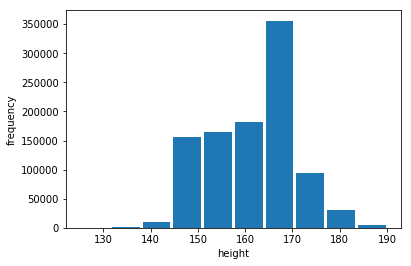

In [28]:
plt.hist(GJ_2009['height'], histtype='bar', rwidth=0.9)
plt.xlabel('height')
plt.ylabel('frequency')
plt.show()

# https://ordo.tistory.com/69

In [30]:
GJ_2009['pred_blood_sugar'] = np.where(GJ_2009['pred_blood_sugar'] >= 126, 1, 0)

# target 변수인 pred_blood_sugar가 126 이상일 때, 당뇨진단으로 판정
# 이분형 자료로 변환
# https://rfriend.tistory.com/tag/Python

In [31]:
GJ_2009['pred_blood_sugar'].value_counts()

# 당뇨진단자 비율 : 약 6%

0    939382
1     60618
Name: pred_blood_sugar, dtype: int64

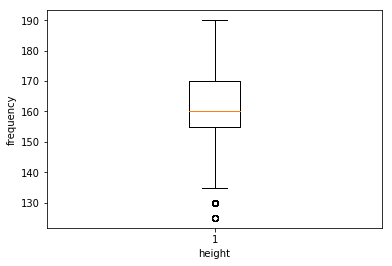

In [32]:
plt.boxplot(GJ_2009['height'])
plt.xlabel('height')
plt.ylabel('frequency')
plt.show()

연속형 변수 목록

-> 신장(5Cm단위) / 체중(5Kg단위) / 허리둘레 / 시력좌 / 시력우 / 수축기혈압 / 이완기혈압 / 식전혈당.공복혈당 / 총콜레스테롤 / 트리글리세라이드 / HDL콜레스테롤 / LDL콜레스테롤 / 혈색소 / 혈청크레아티닌 / X.혈청지오티.AST / X.혈청지오티.ALT / 감마지티피 : 연속형 변수

이산형 변수 목록

-> 성별코드 / 연령대코드 / 시도코드 / 청력좌 / 청력우 / 요단백 / 흡연상태 / 구강검진.수검여부 / 음주여부 : 이산형 변수(성별코드,연령대코드,시도코드,요단백,흡연상태 : 다범주, 나머지 변수 : 이분형)

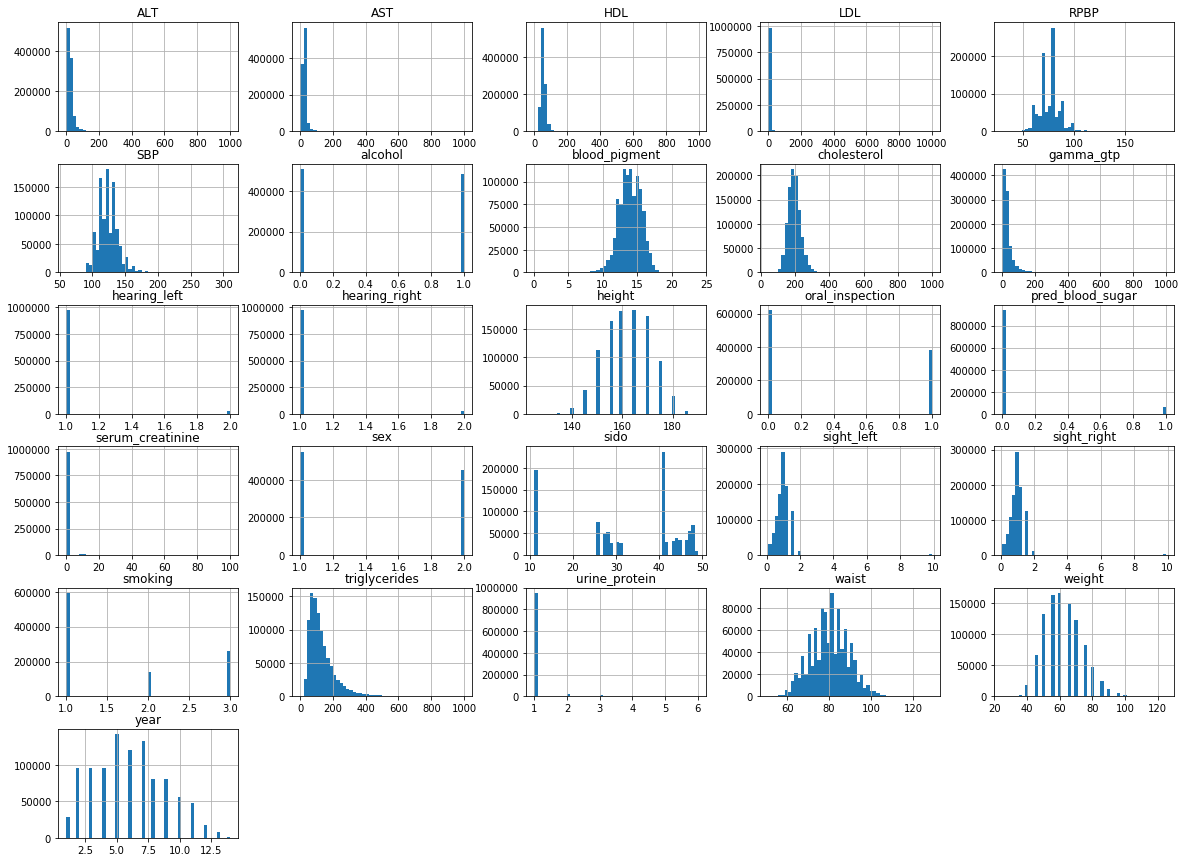

In [33]:
GJ_2009.hist(bins=50, figsize=(20,15))
plt.show()



# ALT / AST / HDL / LDL / RPBP / SBP / cholesterol / gamma_gtp / height / serum_creatinine / sight_left / sight_right -> skwed distribution
# triglycerides / urine_protein / waist / weight -> skwed distribution
# blood_pigment -> normal distribution
# alcohol / oral_inspection -> 이산형, 비교적 고른 분포
# hearing_left / hearing_right / smoking / pred_blood_sugar -> class unbalance
# sex / year / sido -> groupby 기준변수

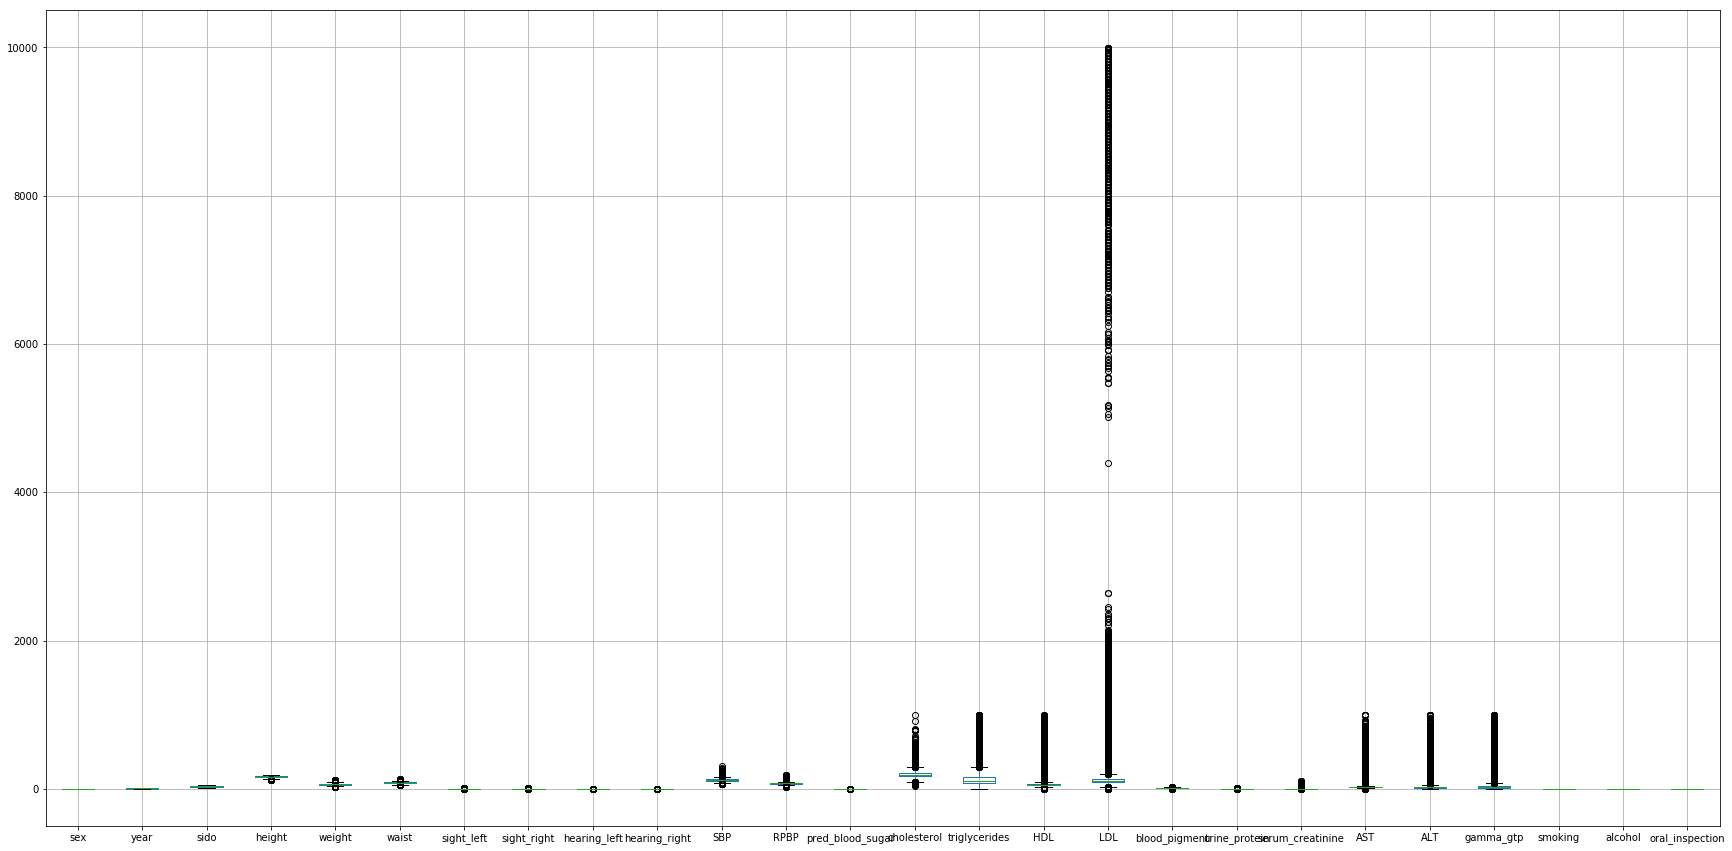

In [34]:
GJ_2009.boxplot(figsize=(30,15))
plt.show()

# 이상치 처리
일반적으로 1) 표준점수로 변환 후 -3 이하 및 +3 제거 2) IQR 방식 3) 도메인 지식 이용하거나 Binning 처리하는 방식이 이용된다.

표준점수 이용할 경우 평균이 0, 표준편차가 1인 분포로 변환한후 +3 이상이거나 -3 이하인 경우 극단치로 처리한다.

IQR 방식은 75% percentile * 1.5 이상이거나 25 percentile* 1.5 이하인 경우 극단치로 처리하는 방식이다.
이해하기 쉽고 적용하기 쉬운 편이지만, 경우에 따라 너무 많은 사례들이 극단치로 고려되는 경우가 있다.

https://wikidocs.net/16582

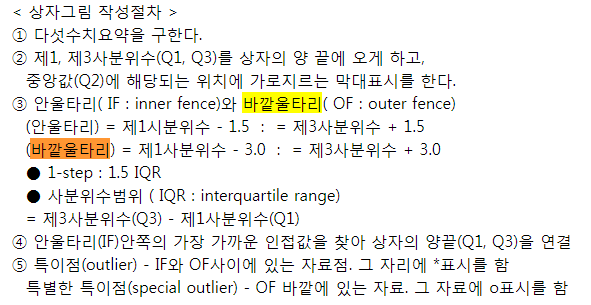

연속형 변수 목록

-> 신장(5Cm단위) / 체중(5Kg단위) / 허리둘레 / 시력좌 / 시력우 / 수축기혈압 / 이완기혈압 / 식전혈당.공복혈당 / 총콜레스테롤 / 트리글리세라이드 / HDL콜레스테롤 / LDL콜레스테롤 / 혈색소 / 혈청크레아티닌 / X.혈청지오티.AST / X.혈청지오티.ALT / 감마지티피 : 연속형 변수

이산형 변수 목록

-> 성별코드 / 연령대코드 / 시도코드 / 청력좌 / 청력우 / 요단백 / 흡연상태 / 구강검진.수검여부 / 음주여부 : 이산형 변수(성별코드,연령대코드,시도코드,요단백,흡연상태 : 다범주, 나머지 변수 : 이분형)

In [35]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3)
    upper_bound = quartile_3 + (iqr * 3)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [36]:
print(np.array(outliers_iqr(GJ_2009['height'])).shape[1],
      np.array(outliers_iqr(GJ_2009['weight'])).shape[1],
      np.array(outliers_iqr(GJ_2009['waist'])).shape[1],
      np.array(outliers_iqr(GJ_2009['sight_left'])).shape[1],
      np.array(outliers_iqr(GJ_2009['sight_right'])).shape[1],
      np.array(outliers_iqr(GJ_2009['SBP'])).shape[1],
      np.array(outliers_iqr(GJ_2009['RPBP'])).shape[1],
      np.array(outliers_iqr(GJ_2009['pred_blood_sugar'])).shape[1],
      np.array(outliers_iqr(GJ_2009['cholesterol'])).shape[1],
      np.array(outliers_iqr(GJ_2009['triglycerides'])).shape[1],
      np.array(outliers_iqr(GJ_2009['HDL'])).shape[1],
      np.array(outliers_iqr(GJ_2009['LDL'])).shape[1],
      np.array(outliers_iqr(GJ_2009['blood_pigment'])).shape[1],
      np.array(outliers_iqr(GJ_2009['serum_creatinine'])).shape[1],
      np.array(outliers_iqr(GJ_2009['AST'])).shape[1],
      np.array(outliers_iqr(GJ_2009['ALT'])).shape[1],
      np.array(outliers_iqr(GJ_2009['gamma_gtp'])).shape[1])

# Outer fence(바깥 울타리) 기준 심각한 이상치는 최소 11개를 가진 변수부터 최대 45298개를 가진 변수까지 있음
# gamma_gtp 변수의 OF 기준 이상치 제거할 경우, 데이터 손실율 약 4.5%
# 특정 연령, 성별, 시/도에 해당하는 범주의 경우, 이상치 비율이 많을 경우 문제 발생
# 이상치 제거 방법으로 IQR 정보를 이용하는 것이 바람직하지 않을 수 있음

0 33 11 2728 2627 627 2313 60618 723 17691 4426 3913 291 24884 22752 27075 45298


데이터 단위 변환
데이터의 스케일(측정단위)이 다를 경우 특히 거리를 기반으로 분류하는 모델(KNN 등)에 부정적인 영향을 미치므로, 스케일링을 통해 단위를 일정하게 맞추는 작업을 진행해야 한다. 아래 방식이 주로 스케일링을 위해 쓰이는 방법이다. 대부분의 통계 분석 방법이 정규성 가정을 기반으로 하므로 완벽하지 않더라도 최대한 정규분포로 변환하는 노력이 필요하다.

Scaling: 평균이 0, 분산이 1인 분포로 변환
MinMax Scaling: 특정 범위 (예, 0~1)로 모든 데이터를 변환
Box-Cox: 여러 k 값중 가장 작은 SSE 선택
Robust_scale: median, interquartile range 사용(outlier 영향 최소화)

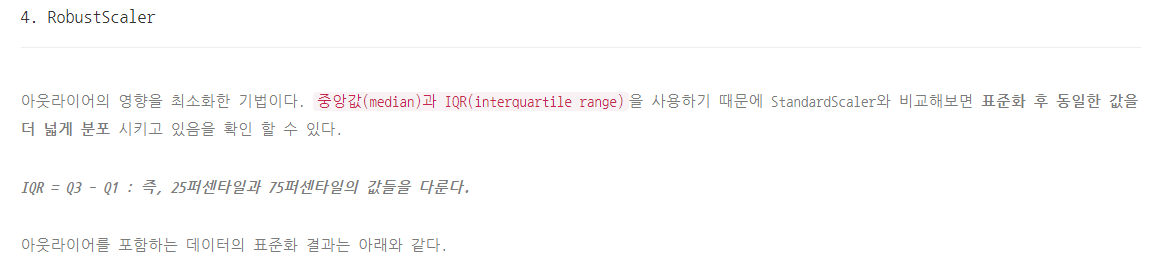

In [37]:
from sklearn.ensemble import IsolationForest

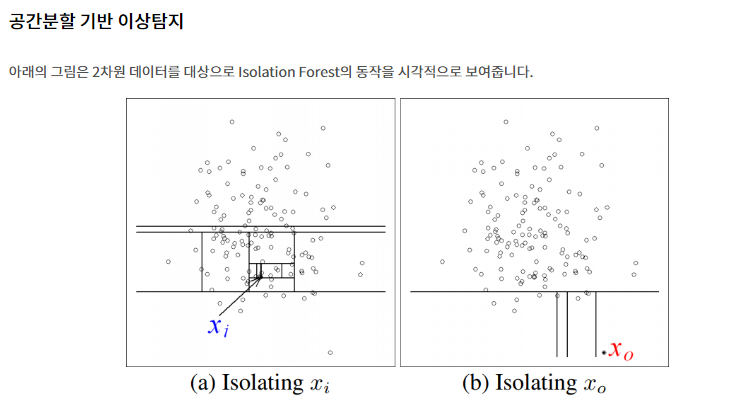

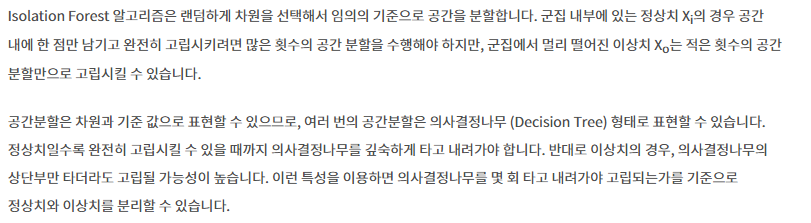

http://ko.logpresso.com/documents/anomaly-detection

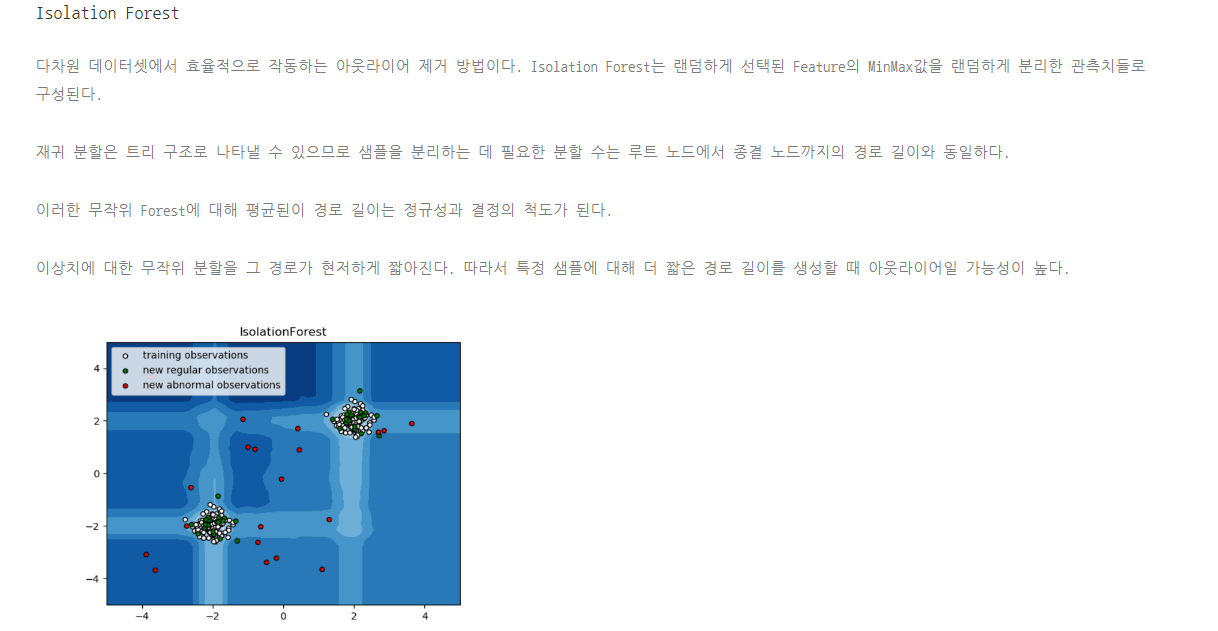

In [38]:
clf = IsolationForest(max_samples=1000, random_state=1, contamination=0.01, max_features=2)
# Isolation Forest 방법을 사용하기 위해, 변수로 선언을 해 준다.
# n_estimators=100 : 학습모형 100개
# max_samples=100 : 모형 당 최대 아웃라이어 갯수 1000개
# contamination='legacy' : 아웃라이어 비율 : 0.01(10000개)
# max_features=2 : 각 학습모형이 2개의 변수로 학습됨
# bootstrap=False : 각 학습모형이 샘플을 비복원 추출함
clf.fit(GJ_2009)
# fit 함수를 이용하여, 데이터셋을 학습
y_pred_outliers = clf.predict(GJ_2009)
# predict 함수를 이용하여, outlier를 판별. 0과 1로 이루어진 Series형태의 데이터가 나옴

out = pd.DataFrame(y_pred_outliers)
out = out.rename(columns={0: "out"})
GJ_2009 = pd.concat([GJ_2009, out], 1)
# 원래의 dataframe에 붙이기. 데이터가 0인 것이 outlier이기 때문에, 0인 것을 제거하면 outlier가 제거된 dataframe을 얻을 수 있음

# https://mkjjo.github.io/python/2019/01/10/outlier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

C:\Users\HanJeongWook\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\HanJeongWook\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [39]:
GJ_2009['out'].value_counts()

# 10000개의 이상치를 detecting(label : -1)

 1    990000
-1     10000
Name: out, dtype: int64

In [40]:
GJ_2009=GJ_2009[GJ_2009['out']==1]

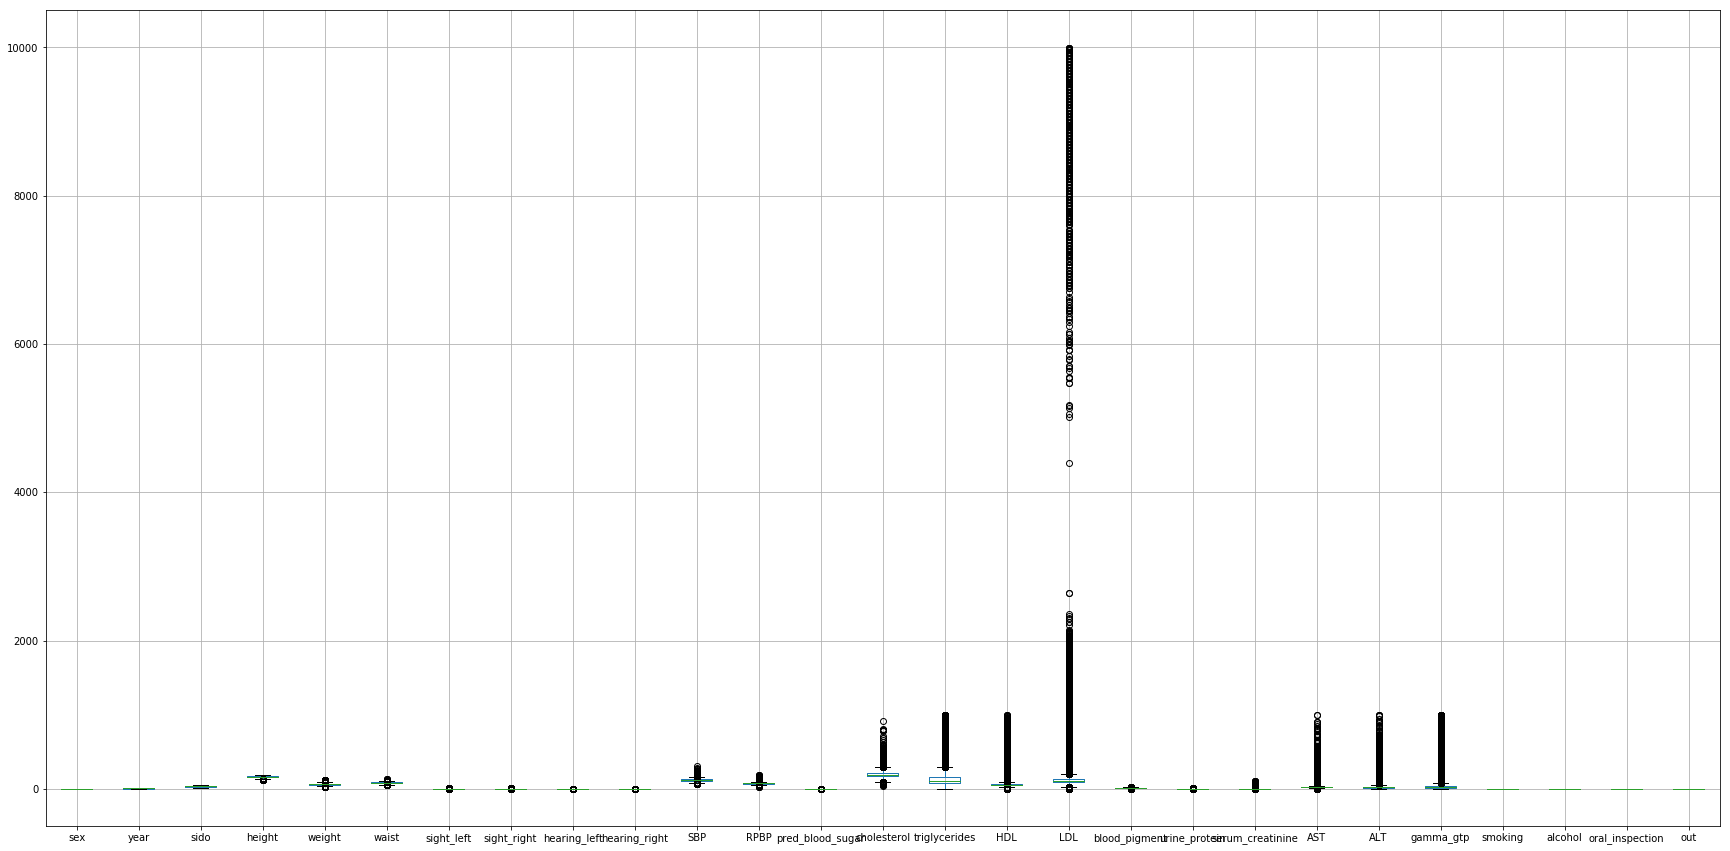

In [41]:
GJ_2009.boxplot(figsize=(30,15))
plt.show()

In [42]:
del GJ_2009['out']

In [43]:
GJ_2009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990000 entries, 0 to 999998
Data columns (total 26 columns):
sex                 990000 non-null int64
year                990000 non-null int64
sido                990000 non-null int64
height              990000 non-null int64
weight              990000 non-null int64
waist               990000 non-null int64
sight_left          990000 non-null float64
sight_right         990000 non-null float64
hearing_left        990000 non-null float64
hearing_right       990000 non-null float64
SBP                 990000 non-null int64
RPBP                990000 non-null int64
pred_blood_sugar    990000 non-null int32
cholesterol         990000 non-null int64
triglycerides       990000 non-null int64
HDL                 990000 non-null int64
LDL                 990000 non-null float64
blood_pigment       990000 non-null float64
urine_protein       990000 non-null float64
serum_creatinine    990000 non-null float64
AST                 990000 non-nu

In [44]:
GJ_2009 = GJ_2009.rename(columns = {'height' : 'height_2009',
                    'weight' : 'weight_2009',
                    'waist' : 'waist_2009',
                    'sight_left' : 'sight_left_2009',
                    'sight_right' : 'sight_right_2009',
                    'hearing_left' : 'hearing_left_2009',
                    'hearing_right' : 'hearing_right_2009',
                    'SBP' : 'SBP_2009',
                    'RPBP' : 'RPBP_2009',
                    'cholesterol' : 'cholesterol_2009',
                    'triglycerides' : 'triglycerides_2009',
                    'HDL' : 'HDL_2009',
                    'LDL' : 'LDL_2009',
                    'blood_pigment' : 'blood_pigment_2009',
                    'urine_protein' : 'urine_protein_2009',
                    'serum_creatinine' : 'serum_creatinine_2009',
                    'AST' : 'AST_2009',
                    'ALT' : 'ALT_2009',
                    'gamma_gtp' : 'gamma_gtp_2009',
                    'smoking' : 'smoking_2009',
                    'alcohol' : 'alcohol_2009',
                    'oral_inspection' : 'oral_inspection_2009'})

# 2017년도 건강검진정보 예측변수(22개) rename

In [45]:
GJ_2009['target'] = GJ_2009['pred_blood_sugar']

In [46]:
del GJ_2009['pred_blood_sugar']

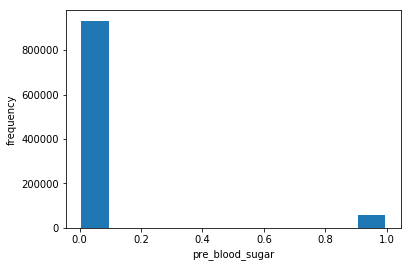

In [47]:
plt.hist(GJ_2009['target'], histtype='bar', rwidth=0.9)
plt.xlabel('pre_blood_sugar')
plt.ylabel('frequency')
plt.show()

# https://ordo.tistory.com/69

In [48]:
GJ_2009_group = GJ_2009.groupby(['sex','year','sido']).mean()

# 시/도 그룹별 평균치를 저장

In [49]:
GJ_2009_group.reset_index(inplace=True)

In [50]:
GJ_2009_group

# 448개 범주를 가지는 자료형태로 변환
# dimension : 448x26

,sex,year,sido,height_2009,weight_2009,waist_2009,sight_left_2009,sight_right_2009,hearing_left_2009,hearing_right_2009,...,blood_pigment_2009,urine_protein_2009,serum_creatinine_2009,AST_2009,ALT_2009,gamma_gtp_2009,smoking_2009,alcohol_2009,oral_inspection_2009,target
0,1,1,11,172.074602,67.238055,77.938810,1.077284,1.053143,1.005868,1.002515,...,15.145264,1.031042,1.143504,23.340319,23.011735,24.309304,2.083893,0.720404,0.565801,0.006706
1,1,1,26,171.174699,66.204819,77.902108,1.065964,1.073946,1.006024,1.003012,...,15.178916,1.043675,1.525000,23.039157,22.390060,23.403614,2.102574,0.755285,0.530120,0.004518
2,1,1,27,171.091082,66.565465,78.438330,1.087476,1.069070,1.003795,1.005693,...,15.192979,1.037951,1.219734,23.798861,22.946869,25.316888,2.146110,0.673712,0.388994,0.015180
3,1,1,28,171.563492,67.928571,78.465079,1.138413,1.147937,1.007937,1.003175,...,15.147302,1.058825,1.241111,24.849206,22.998413,26.496825,2.112881,0.705415,0.652381,0.001587
4,1,1,29,170.962343,65.125523,78.338912,1.098326,1.113389,1.000000,1.004184,...,15.065690,1.062762,1.277406,24.698745,23.803347,25.669456,2.020921,0.714291,0.606695,0.012552
5,1,1,30,171.060000,66.380000,77.524000,1.140000,1.114000,1.008000,1.004000,...,15.214800,1.048000,1.096000,23.948000,22.008000,25.736000,2.188000,0.730932,0.620000,0.004000
6,1,1,31,171.018182,66.963636,78.690909,1.095273,1.101091,1.000000,1.003636,...,15.061818,1.021818,2.210545,23.774545,21.938182,24.756364,2.196364,0.636073,0.683636,0.010909
7,1,1,41,171.119403,66.105656,77.450511,1.134132,1.120621,1.002749,1.003142,...,15.194540,1.044401,1.164218,23.698743,22.503535,25.967007,2.134042,0.688680,0.586803,0.004713
8,1,1,42,171.814745,67.930057,77.848771,1.148393,1.145747,1.001890,1.000000,...,14.978072,1.034026,1.113989,24.283554,22.665406,25.041588,2.253308,0.733459,0.731569,0.001890
9,1,1,43,170.697941,66.430206,77.313501,1.172540,1.177803,1.006865,1.006865,...,15.237300,1.018307,1.031808,23.551487,22.430206,25.979405,2.153318,0.720824,0.631579,0.002288


In [51]:
GJ_2009_group.to_csv("GJ_2009_group.csv")

# 2009년 건강검진정보 데이터전처리 -> 448개 범주화된 자료를 csv로 저장
# https://tariat.tistory.com/583

In [ ]:
# 척도화
# https://mkjjo.github.io/python/2019/01/10/scaler.html

# 데이터 분할
# https://pythonanalysis.tistory.com/7

# 데이터 분포 변환
# https://wikidocs.net/16582